<a href="https://colab.research.google.com/github/L4-DEV/Alura-Challenge/blob/main/AluraStore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)



loja4.head()



,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Lava louças,eletrodomesticos,1446.46,74.604083,11/11/2022,Rafael Costa,SP,4,cartao_credito,3,-22.19,-48.79
1,Cama box,moveis,631.70,33.919251,03/01/2020,Thiago Silva,GO,5,cartao_credito,2,-15.98,-49.86
2,Bola de basquete,esporte e lazer,31.54,0.000000,25/12/2022,Larissa Alves,MG,5,boleto,1,-18.10,-44.38
3,Modelagem preditiva,livros,76.93,1.680730,23/11/2021,Lucas Oliveira,MG,3,boleto,1,-18.10,-44.38
4,Fone de ouvido,eletronicos,185.14,7.442587,25/04/2022,Bianca Santos,SP,4,cartao_credito,7,-22.19,-48.79


#1. Análise do faturamento


Vamos calcular o faturamento total de cada loja. Somando os valores da coluna Preço de cada loja para estimar o faturamento.

In [ ]:
#Loja  = Aricanduva
#Loja 2 = Itaquera
#Loja 3 = Anália Franco
#Loja 4 = Tatuapé

lojas = [loja, loja2, loja3, loja4]
nomes = ["Aricanduva", "Itaquera", "Anália Franco", "Tatuapé"]

faturamentos = {}
# ENUMERATE: retorna indice e valor.
for i, df in enumerate(lojas):
    faturamento = df["Preço"].sum()
    print (f"{nomes[i]} faturou R$ {faturamento:,.2f}")


Aricanduva faturou R$ 1,534,509.12
Itaquera faturou R$ 1,488,459.06
Anália Franco faturou R$ 1,464,025.03
Tatuapé faturou R$ 1,384,497.58


# 2. Vendas por Categoria


Vamos calcular a quantidade dos produtos mais vendidos e sua categoria em cada loja.

In [3]:
lojas = {
    'Aricanduva': loja['Categoria do Produto'],
    'Itaquera': loja2['Categoria do Produto'],
    'Anália Franco': loja3['Categoria do Produto'],
    'Tatuapé': loja4['Categoria do Produto']
}

In [ ]:

resultado_mais_vendido = {}

for nome_loja, categorias in lojas.items():   # iterando sobre a loja, recebendo lista de categorias de cada loja
    contagem = {}  # dic com a contagem de ocorrências de cada categoria, ex: {'Eletrônicos': 2, 'Roupas': 3}

    for categoria in categorias:
        if categoria in contagem:
            contagem[categoria] += 1  # contabiliza ocorrências
        else:
            contagem[categoria] = 1  # adiciona nova categoria

    # encontra a categoria mais vendida
    categoria_mais_vendida, quantidade = max(contagem.items(), key=lambda item: item[1])

    resultado_mais_vendido[nome_loja] = (categoria_mais_vendida, quantidade)

# exibe o resultado por loja
for loja, (categoria, quantidade) in resultado_mais_vendido.items():
    print(f"""
Loja: {loja}
Categoria mais vendida: {categoria}
Quantidade vendida: {quantidade}
""")

# verifica a loja com a categoria mais vendida no geral
top_loja, (top_categoria, top_vendas) = max(resultado_mais_vendido.items(), key=lambda item: item[1][1])

nome_da_loja = top_loja
categoria_da_loja = top_categoria
vendas_da_categoria = top_vendas

print(f"""A Loja que tem a categoria top de vendas foi: {nome_da_loja}
Com a categoria: {categoria_da_loja}
Com total de {vendas_da_categoria:,} vendas""")


Loja: Aricanduva
Categoria mais vendida: moveis
Quantidade vendida: 465


Loja: Itaquera
Categoria mais vendida: moveis
Quantidade vendida: 442


Loja: Anália Franco
Categoria mais vendida: moveis
Quantidade vendida: 499


Loja: Tatuapé
Categoria mais vendida: moveis
Quantidade vendida: 480

A Loja que tem a categoria top de vendas foi: Anália Franco
Com a categoria: moveis
Com total de 499 vendas


Vamos calcular a quantidade dos produtos menos vendidos e sua categoria em cada loja.

In [4]:
resultado_menos_vendido = {}

for nome_loja, categorias in lojas.items():  # iterando sobre cada loja
    contagem = {}  # dicionário para contar as ocorrências de cada categoria

    for categoria in categorias:
        if categoria in contagem:
            contagem[categoria] += 1
        else:
            contagem[categoria] = 1

    # encontra a categoria menos vendida
    categoria_menos_vendida, quantidade = min(contagem.items(), key=lambda item: item[1])

    resultado_menos_vendido[nome_loja] = (categoria_menos_vendida, quantidade)


for loja, (categoria, quantidade) in resultado_menos_vendido.items():
    print(f"""
Loja: {loja}
Categoria menos vendida: {categoria}
Quantidade vendida: {quantidade}
""")

loja_com_pior_categoria, (categoria_menos, qtd_menos) = min(resultado_menos_vendido.items(), key=lambda item: item[1][1])

print(f"""A loja com a categoria menos vendida no geral foi: {loja_com_pior_categoria}
Com a categoria: {categoria_menos}
Com apenas {qtd_menos:,} venda(s)""")




Loja: Aricanduva
Categoria menos vendida: utilidades domesticas
Quantidade vendida: 171


Loja: Itaquera
Categoria menos vendida: utilidades domesticas
Quantidade vendida: 181


Loja: Anália Franco
Categoria menos vendida: instrumentos musicais
Quantidade vendida: 177


Loja: Tatuapé
Categoria menos vendida: instrumentos musicais
Quantidade vendida: 170

A loja com a categoria menos vendida no geral foi: Tatuapé
Com a categoria: instrumentos musicais
Com apenas 170 venda(s)


# 3. Média de Avaliação das Lojas

Vamos calcular a média das avaliações dos clientes para cada loja.

In [ ]:
loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

lojas = {
    'Aricanduva': loja['Avaliação da compra'],
    'Itaquera': loja2['Avaliação da compra'],
    'Anália Franco': loja3['Avaliação da compra'],
    'Tatuapé': loja4['Avaliação da compra']
}

In [ ]:
# [expr for item in lista de listas]

media = lambda avaliacoes: sum(avaliacoes) / len(avaliacoes) # funcao media


medias = [media(avaliacoes) for avaliacoes in lojas.values()] # iterando pelas notas chamando a funcao media

#iterando para exibir as notas.
for nome_loja, media_avalicao in zip(lojas.keys(), medias):               #zip compacta em uma tupla
    print(f"A média da loja {nome_loja} é: {media_avalicao:.2f}\n")



A média da loja Aricanduva é: 3.98

A média da loja Itaquera é: 4.04

A média da loja Anália Franco é: 4.05

A média da loja Tatuapé é: 4.00



# 4. Produtos Mais e Menos Vendidos

Vamos calcular os produtos menos vendidos.

In [7]:
loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

lojas = {
    'Aricanduva': loja['Produto'],
    'Itaquera': loja2['Produto'],
    'Anália Franco': loja3['Produto'],
    'Tatuapé': loja4['Produto']
}

In [8]:
from collections import Counter

# Função para encontrar os produtos menos vendidos (com possíveis empates)
def produtos_menos_vendidos(produtos):
    contagem = Counter(produtos)
    menor_quantidade = min(contagem.values())
    return [(produto, qtd) for produto, qtd in contagem.items() if qtd == menor_quantidade]

resultados_menos_vendidos = {}


for nome_da_loja, categorias in lojas.items():
    menos_vendidos = produtos_menos_vendidos(categorias)
    resultados_menos_vendidos[nome_da_loja] = menos_vendidos

    if len(menos_vendidos) > 1:
        print(f"\nNa loja {nome_da_loja}, houve empate entre os produtos menos vendidos:")
        for produto, qtd in menos_vendidos:
            print(f" - Produto: {produto} | Quantidade: {qtd}")
    else:
        produto, qtd = menos_vendidos[0]
        print(f"\nO produto menos vendido na loja {nome_da_loja} foi: {produto} com {qtd} vendas.")


Na loja Aricanduva, houve empate entre os produtos menos vendidos:
 - Produto: Headset | Quantidade: 33
 - Produto: Celular ABXY | Quantidade: 33

O produto menos vendido na loja Itaquera foi: Jogo de tabuleiro com 32 vendas.

O produto menos vendido na loja Anália Franco foi: Blocos de montar com 35 vendas.

O produto menos vendido na loja Tatuapé foi: Guitarra com 33 vendas.


Vamos calcular os mais vendidos.

In [9]:
from collections import Counter

# Função para encontrar os produtos mais vendidos (com possíveis empates)
def produtos_mais_vendidos(produtos):
    contagem = Counter(produtos)
    maior_quantidade = max(contagem.values())
    return [(produto, qtd) for produto, qtd in contagem.items() if qtd == maior_quantidade]

resultados_mais_vendidos = {}

for nome_da_loja, produtos in lojas.items():
    mais_vendidos = produtos_mais_vendidos(produtos)
    resultados_mais_vendidos[nome_da_loja] = mais_vendidos

    if len(mais_vendidos) > 1:
        print(f"\nNa loja {nome_da_loja}, houve empate entre os produtos mais vendidos:")
        for produto, qtd in mais_vendidos:
            print(f" - Produto: {produto} | Quantidade: {qtd}")
    else:
        produto, qtd = mais_vendidos[0]
        print(f"\nO produto mais vendido na loja {nome_da_loja} foi: {produto} com {qtd} vendas.")


Na loja Aricanduva, houve empate entre os produtos mais vendidos:
 - Produto: Micro-ondas | Quantidade: 60
 - Produto: TV Led UHD 4K | Quantidade: 60
 - Produto: Guarda roupas | Quantidade: 60

O produto mais vendido na loja Itaquera foi: Iniciando em programação com 65 vendas.

O produto mais vendido na loja Anália Franco foi: Kit banquetas com 57 vendas.

O produto mais vendido na loja Tatuapé foi: Cama box com 62 vendas.


#EXTRA
*calculando o top 10 de produtos de cada loja*

In [ ]:
from collections import CounteR

top_10_por_loja = {}


def top_10_produtos(produtos):
    contagem = Counter(produtos)
    return contagem.most_common(10)

for nome_loja, produtos in lojas.items():
    top_10 = top_10_produtos(produtos)
    print(f"\nTop 10 produtos mais vendidos na loja {nome_loja}:")
    for i, (produto, qtd) in enumerate(top_10, start=1):
        print(f"{i}. Produto: {produto} | Quantidade: {qtd}")


Top 10 produtos mais vendidos na loja Aricanduva:
1. Produto: Micro-ondas | Quantidade: 60
2. Produto: TV Led UHD 4K | Quantidade: 60
3. Produto: Guarda roupas | Quantidade: 60
4. Produto: Secadora de roupas | Quantidade: 58
5. Produto: Blocos de montar | Quantidade: 56
6. Produto: Cômoda | Quantidade: 56
7. Produto: Bola de basquete | Quantidade: 55
8. Produto: Geladeira | Quantidade: 54
9. Produto: Bicicleta | Quantidade: 54
10. Produto: Copo térmico | Quantidade: 54

Top 10 produtos mais vendidos na loja Itaquera:
1. Produto: Iniciando em programação | Quantidade: 65
2. Produto: Micro-ondas | Quantidade: 62
3. Produto: Bateria | Quantidade: 61
4. Produto: Pandeiro | Quantidade: 58
5. Produto: Violão | Quantidade: 58
6. Produto: Secadora de roupas | Quantidade: 57
7. Produto: Celular Plus X42 | Quantidade: 55
8. Produto: Blocos de montar | Quantidade: 54
9. Produto: Guarda roupas | Quantidade: 54
10. Produto: Jogo de panelas | Quantidade: 52

Top 10 produtos mais vendidos na loja An

# 5. Frete Médio por Loja


Vamos calcular o frete médio por loja.

In [ ]:
loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

lojas = {
    'Aricanduva': loja['Frete'],
    'Itaquera': loja2['Frete'],
    'Anália Franco': loja3['Frete'],
    'Tatuapé': loja4['Frete']
}


In [ ]:
media = lambda frete: sum(frete) / len(frete)

medias = [media(frete) for frete in lojas.values()]

# Exibindo a média para cada loja
for nome_loja, media_frete in zip(lojas.keys(), medias):
    print(f"A média da frete {nome_loja} é: {media_frete:.2f}\n")

A média da frete Aricanduva é: 34.69

A média da frete Itaquera é: 33.62

A média da frete Anália Franco é: 33.07

A média da frete Tatuapé é: 31.28



#Gerando gráfico

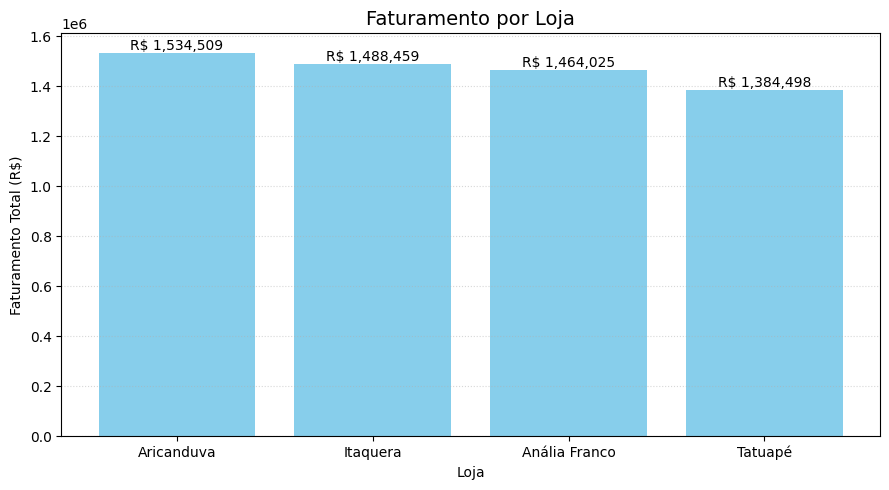

In [ ]:
import matplotlib.pyplot as plt

nomes_lojas = list(lojas.keys())

# Criar gráfico de barras
plt.figure(figsize=(9, 5))  # altura e largura da figura global
bars = plt.bar(nomes, faturamentos, color='skyblue')  # cor das barras

# Adicionar os valores em cima das barras
for bar, valor in zip(bars, faturamentos):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'R$ {valor:,.0f}', ha='center', va='bottom', fontsize=10)

# Títulos e rótulos
plt.title('Faturamento por Loja', fontsize=14)  # Cabeçalho
plt.xlabel('Loja')  # Rótulo do eixo X
plt.ylabel('Faturamento Total (R$)')  # Rótulo do eixo Y
plt.grid(axis='y', linestyle=':', alpha=0.5)  # Linha de grade no eixo Y
plt.tight_layout()  # Organiza o layout e os espaços

# Exibir o gráfico
plt.show()


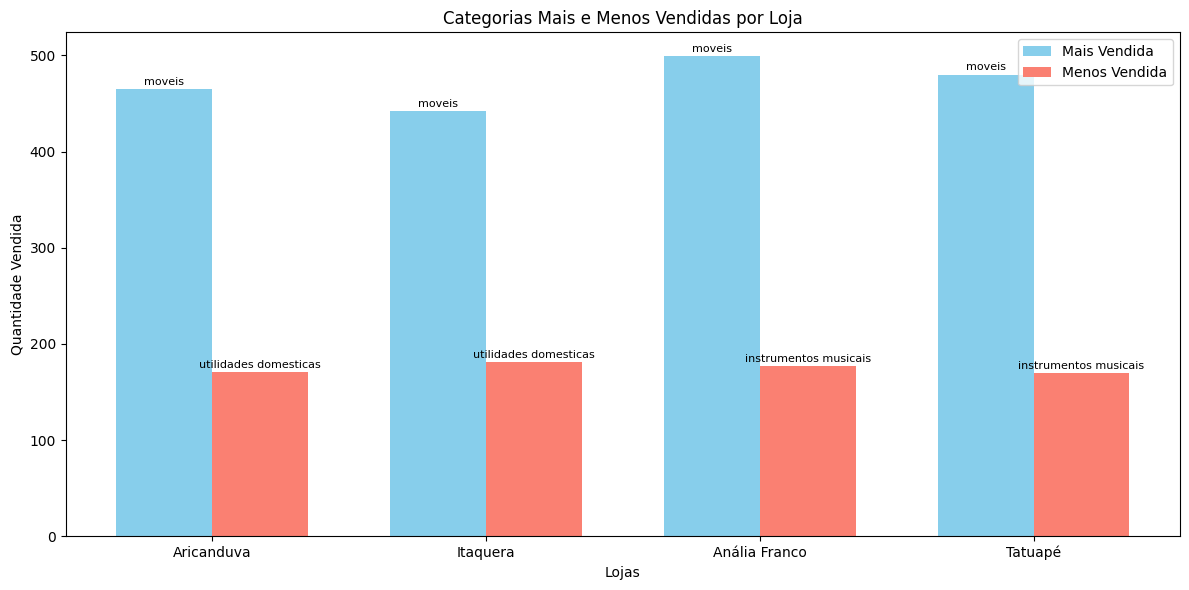

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Lojas
lojas_nomes = list(resultado_mais_vendido.keys())

# Dados para as barras
categorias_mais = []
quantidades_mais = []
categorias_menos = []
quantidades_menos = []

for loja in lojas_nomes:
    cat_mais, qtd_mais = resultado_mais_vendido[loja]
    cat_menos, qtd_menos = resultado_menos_vendido[loja]

    categorias_mais.append(cat_mais)
    quantidades_mais.append(qtd_mais)
    categorias_menos.append(cat_menos)
    quantidades_menos.append(qtd_menos)

# Eixo X
x = np.arange(len(lojas_nomes))
largura = 0.35

# Criar gráfico
plt.figure(figsize=(12, 6))
barras_mais = plt.bar(x - largura/2, quantidades_mais, width=largura, label='Mais Vendida', color='skyblue')
barras_menos = plt.bar(x + largura/2, quantidades_menos, width=largura, label='Menos Vendida', color='salmon')

# Anotar categorias acima das barras
for i in range(len(lojas_nomes)):
    plt.annotate(categorias_mais[i],
                 xy=(x[i] - largura/2, quantidades_mais[i]),
                 xytext=(0, 3), textcoords="offset points",
                 ha='center', fontsize=8)

    plt.annotate(categorias_menos[i],
                 xy=(x[i] + largura/2, quantidades_menos[i]),
                 xytext=(0, 3), textcoords="offset points",
                 ha='center', fontsize=8)

# Configurações do gráfico
plt.title("Categorias Mais e Menos Vendidas por Loja")
plt.xlabel("Lojas")
plt.ylabel("Quantidade Vendida")
plt.xticks(x, lojas_nomes)
plt.legend()
plt.tight_layout()
plt.show()

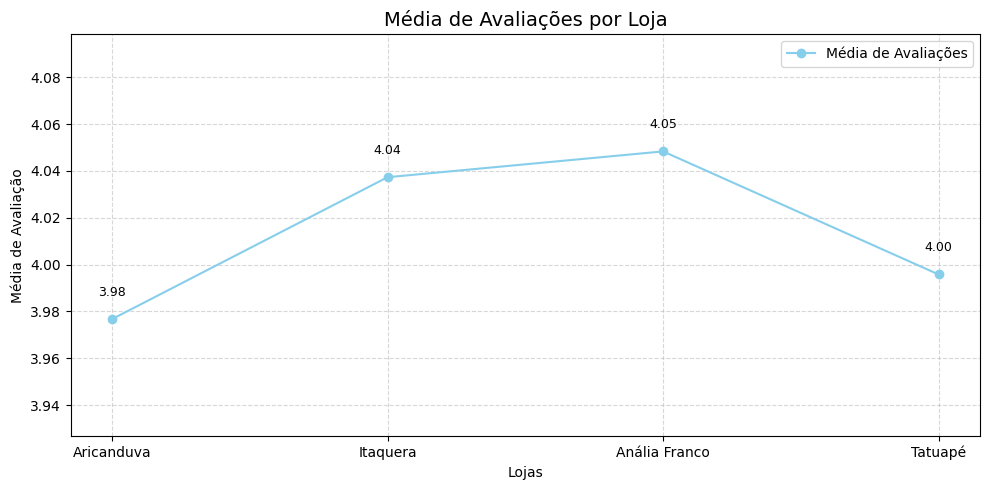

In [ ]:
nomes_lojas = list(lojas.keys())

# Criação do gráfico
plt.figure(figsize=(10, 5))
plt.plot(nomes_lojas, medias, marker='o', linestyle='-', color='skyblue', label='Média de Avaliações')

# Adicionando os valores no gráfico
for i, valor in enumerate(medias):
    plt.text(i, valor + 0.01, f"{valor:.2f}", ha='center', fontsize=9, color='black')

# Configurações visuais
plt.title("Média de Avaliações por Loja", fontsize=14)
plt.xlabel("Lojas")
plt.ylabel("Média de Avaliação")
plt.ylim(min(medias) - 0.05, max(medias) + 0.05)  # margem extra no eixo Y
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.legend()
plt.show()

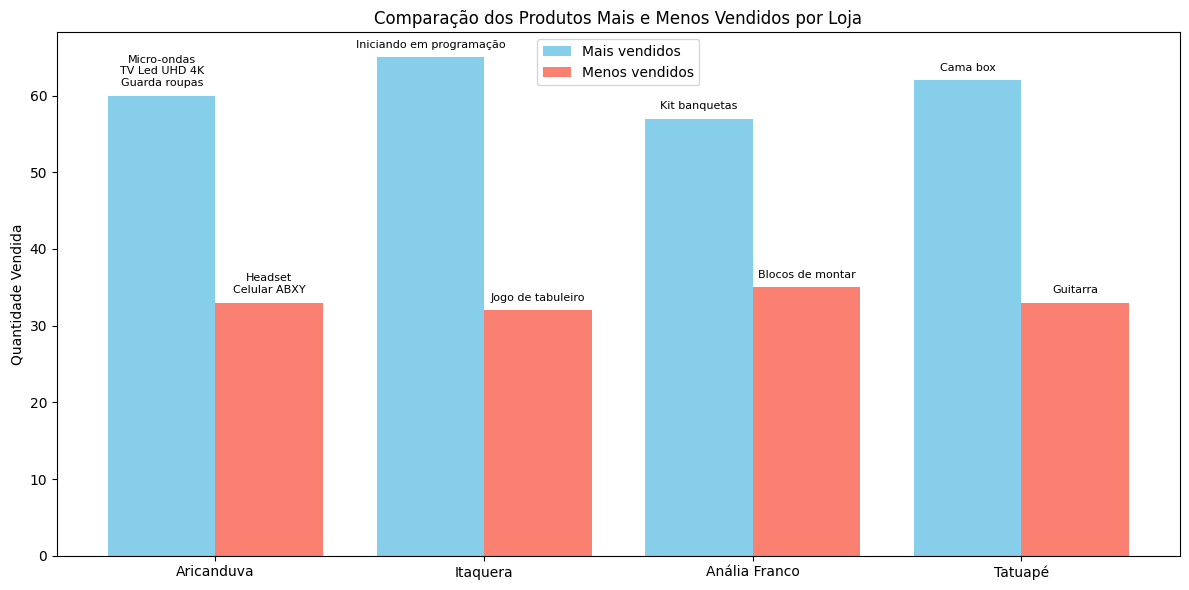

In [11]:
def formatar_produtos(produtos):
    return '\n'.join([produto for produto, _ in produtos])

lojas = list(resultados_mais_vendidos.keys())

# Preparando dados para o gráfico
nomes_mais = [formatar_produtos(resultados_mais_vendidos[loja]) for loja in lojas]
valores_mais = [resultados_mais_vendidos[loja][0][1] for loja in lojas]

nomes_menos = [formatar_produtos(resultados_menos_vendidos[loja]) for loja in lojas]
valores_menos = [resultados_menos_vendidos[loja][0][1] for loja in lojas]

x = range(len(lojas))
largura = 0.4

# Plotando o gráfico
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar([i - largura/2 for i in x], valores_mais, width=largura, label='Mais vendidos', color='skyblue')
ax.bar([i + largura/2 for i in x], valores_menos, width=largura, label='Menos vendidos', color='salmon')

# Adicionando os nomes dos produtos como texto acima das barras
for i in range(len(lojas)):
    ax.text(i - largura/2, valores_mais[i] + 1, nomes_mais[i], ha='center', va='bottom', fontsize=8)
    ax.text(i + largura/2, valores_menos[i] + 1, nomes_menos[i], ha='center', va='bottom', fontsize=8)

ax.set_xticks(x)
ax.set_xticklabels(lojas)
ax.set_ylabel('Quantidade Vendida')
ax.set_title('Comparação dos Produtos Mais e Menos Vendidos por Loja')
ax.legend()
plt.tight_layout()
plt.show()

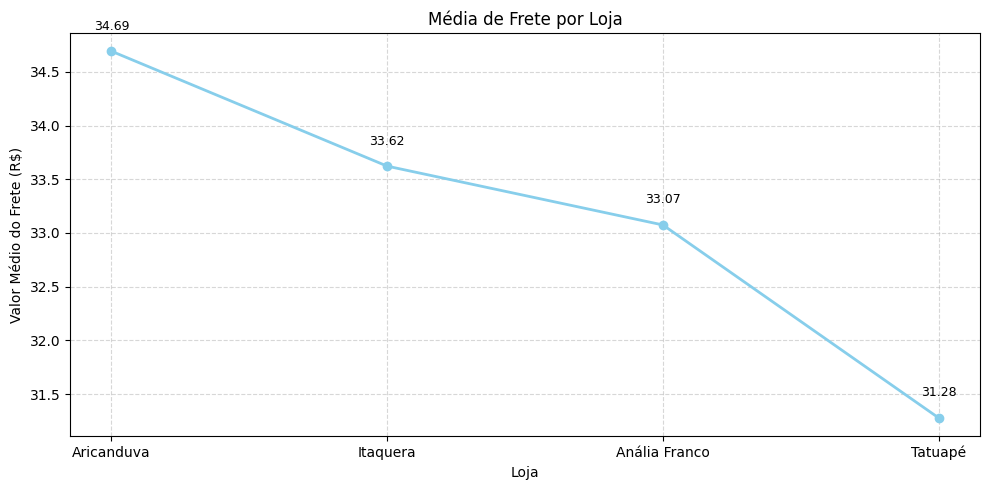

In [ ]:
import matplotlib.pyplot as plt

#Caso va rodar o codigo certifique-se de rodar anteriormente as cedulas que correspondem a este trecho de frete, para termos as atribuições de nomes e colunas corretas.
lojas_nomes = list(lojas.keys())
medias_frete = medias

plt.figure(figsize=(10, 5))
plt.plot(lojas_nomes, medias_frete, marker='o', linestyle='-', color='skyblue', linewidth=2)

# Anotando os valores sobre os pontos
for i, valor in enumerate(medias_frete):
    plt.text(lojas_nomes[i], valor + 0.2, f'{valor:.2f}', ha='center', fontsize=9)

# Configurações do gráfico
plt.title("Média de Frete por Loja")
plt.xlabel("Loja")
plt.ylabel("Valor Médio do Frete (R$)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#Relatório Final

Com base nas análises realizadas e nos gráficos gerados, é hora de sintetizar suas descobertas em um relatório final. Dentro do seu Colab, você deve escrever um texto explicando qual loja o Senhor João deve vender, levando em consideração todos os fatores analisados, como:

O faturamento total das lojas.

As categorias de produtos mais e menos vendidas.

A média das avaliações de clientes por loja.

Os produtos mais e menos vendidos.

O frete médio de cada loja.

Em seu relatório, inclua a justificativa para sua decisão, apoiada nas análises e nas visualizações que você gerou. Explique, de forma clara e objetiva, os motivos pelos quais uma loja se destaca (ou não) em relação às outras, considerando os pontos fortes e fracos de cada uma.

Seu relatório deve ser bem estruturado, com uma introdução que explique o objetivo da análise, um desenvolvimento com a apresentação dos dados e gráficos, e uma conclusão recomendando a loja que deve ser vendida e justificando a escolha.

#ANÁLISE
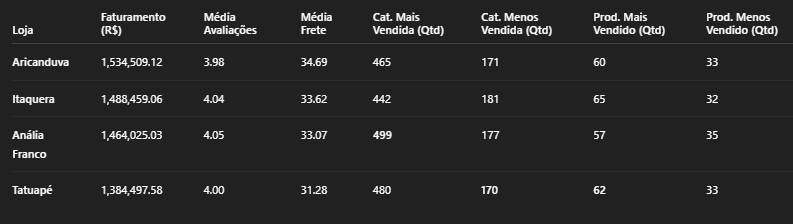

Analisando os dados dos fatores solcitados, foi possível notar equilibrio em quase todas as métricas, inclusive tendo móveis como a categoria mais vendida de todas as lojas, sem um target por parte do cliente, para minha ánalise vou considerar a média do faturamento das lojas e média de avaliações pensando no lucro e na satisfação dos clientes:
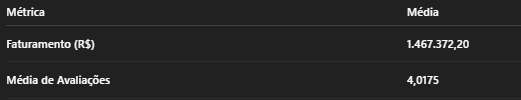

#Conclusão



 João deve vender a loja 4 (Tatuapé), pois seu faturamento está abaixo da média, enquanto podemos observar que a loja com pior avaliação é a loja Aricanduva, que mesmo tendo a pior avaliação é muito próxima da média e como vantagem detém o maior faturamento entre todas as lojas.


**Observações**

- Para uma ánalise mais assertiva é necessário definir um target, entendendo melhor os objetivos do cliente, quesitos como: nichos, regionalidade, cobertura de regiões, localidade, concorrência, público alvo e etc... Definirão por qual caminho a ánalise seguirá.
